
<h1 style="background-color:DodgerBlue;color:White;height:100px">Pricing Analysis for Competition</h1>



<h2 style="color:Tomato;"> Methodology</h2>



<b> All source data are continuous. </b>

<b> Categories are engineered from the continuous data. </b>

Categories are heavily dependent on quartile analysis.  Example – given an array for some variable.  Determine the Upper and lower quartile.  A classification of a datapoint can be made from the quartile analysis – under the lower quartile is low, over the upper quartile is high, all others are average. 

<b> Granularity </b>

Data Points (Obs) are at the Office, Year, Month Level.

<b> Seasonality </b>

All sales data were de-seasonlized and trended to 2018.

GP, Hours Worked, Wages were all calculated as a function of de-seasonalized sales.

Essentially all data points are transformed to negate time series and auto-correlation.  




In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df  = pd.read_csv('COMPETITION_DATA_FRAME.csv')


In [3]:
df.head()

,obs,office,region,area,gp_hour,margin,total_price_var,competition_office_count_bin,national_chain_office_pct_bin,office_vol_vs_all_staff_office_bin,total_comp_office_cnt,national_chain_office_cnt,national_chain_ratio,total_staffing_payroll_per_month,total_staffing_payroll_per_month per_estab
0,O3729,Cedar Rapids,Midwest,Heartland,8.557064,0.266309,-0.399231,3 to 7,More than 2/3,Higher,4,4,1,7.250904,5.179022
1,O364,Charleston Sc,Southeast,Atlanta,8.871289,0.317200,-0.375145,Over 7,Less than 2/3,Lower,18,6,0.333333333,7.679092,5.242929
2,O891,Youngstown,Northeast,Keystone,11.385421,0.304352,-0.372929,3 to 7,More than 2/3,Lower,6,6,1,7.272750,5.259913
3,O4991,Hartford,Northeast,New England,9.722338,0.221276,-0.358154,Over 7,Less than 2/3,Higher,13,6,0.461538462,7.871318,5.223935
4,O4763,Ft Myers,Southeast,South Florida,5.847560,0.236347,-0.315919,Over 7,Less than 2/3,Lower,8,5,0.625,7.085323,5.150825


<b> Definitions of measures - </b>

<b> gp_hour </b> = Gross profit dollars divided by the hours worked aggregated from the invoice level

<b> margin </b>  = Gross profit dollars divided by total sales aggregated from the invoice level

<b> total_price_var </b>  = Total billing variance divided by total sales aggregated from the invoice level

<b> total_comp_office_cnt </b> = Count of all competing staffing offices within the MSA of the TI office

<b> national_chain_office_cnt </b> = Count of competing staffing offices within {EXPRESS,PEOPLEREADY,MANPOWER,AEROTEK,LABORFINDERS,LABORMAX}

<b> national_chain_ratio </b> = national_chain_office_cnt divided by total_comp_office_cnt

<b> total_staffing_payroll_per_month </b>  = the total monthly payroll amount generated by staffing companies within the MSA of the office at a log base 10

<b> total_staffing_payroll_per_month per_estab </b> = the total monthly payroll amount generated by staffing companies within the MSA of the office divided by total_comp_office_cnt at a log base 10

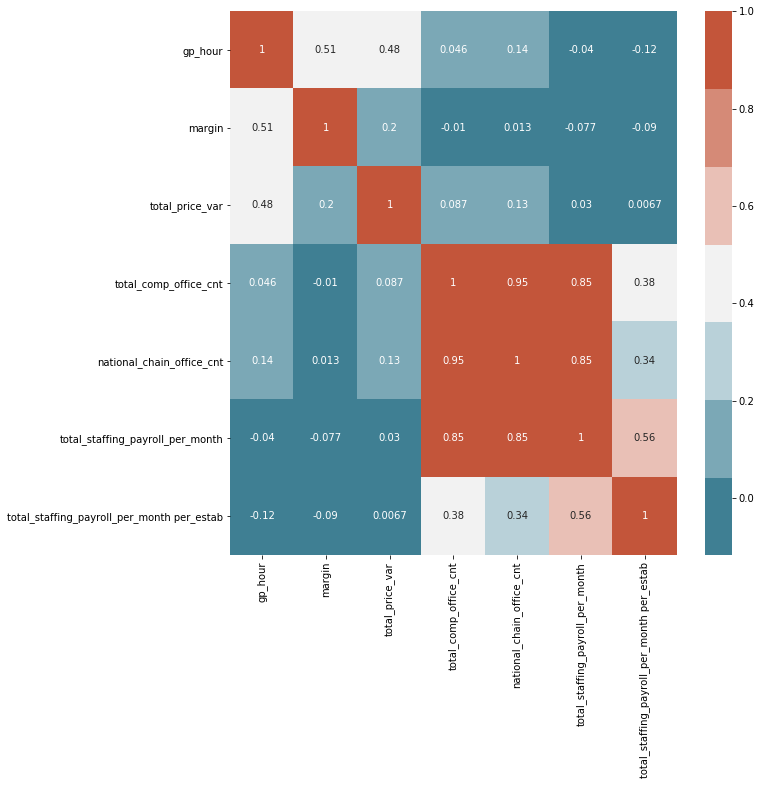

In [4]:
palette = sns.diverging_palette(220, 20, n=7)

df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),cmap=palette, ax=ax, annot=True)

C:\Users\anthony.macko\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\anthony.macko\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


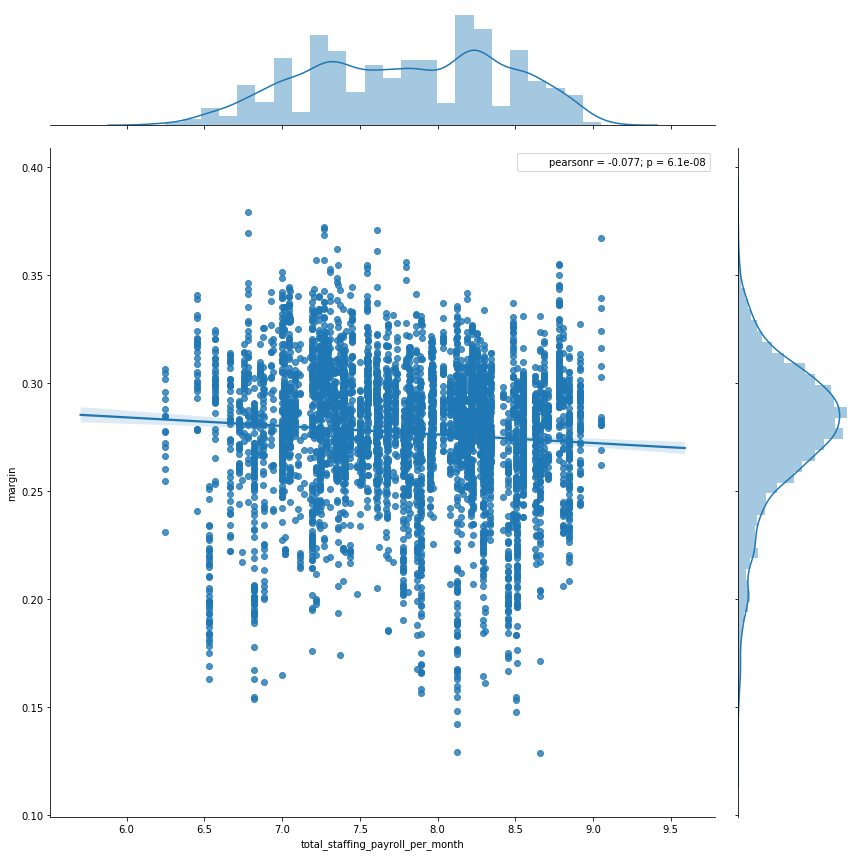

In [5]:
plot2 = sns.jointplot(x='total_staffing_payroll_per_month',y='margin',data=df , height = 12, kind='reg')
plot2.annotate(stats.pearsonr)

In [6]:
df = df.loc[df['competition_office_count_bin'] != 'UNK']

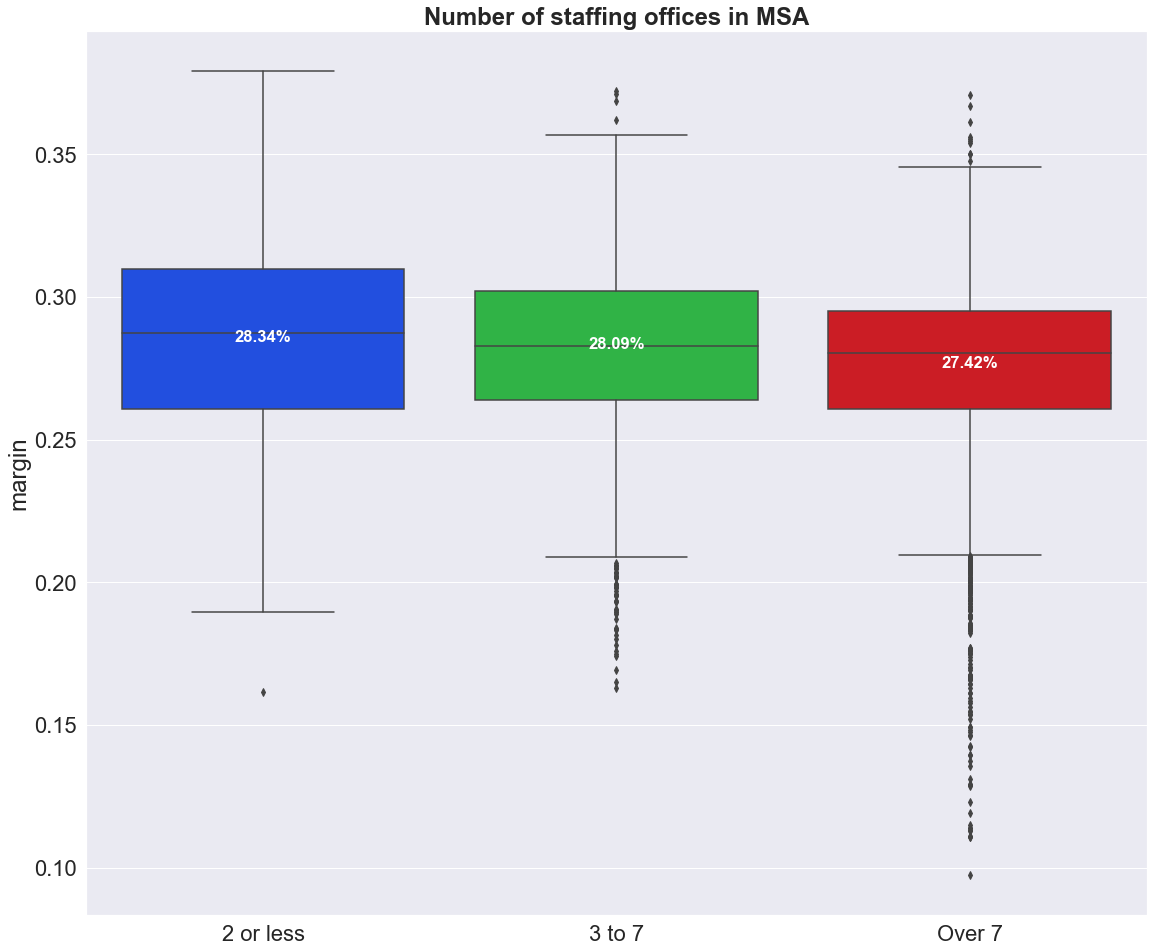

In [7]:
order = ['2 or less','3 to 7','Over 7']

sns.set(rc={'figure.figsize':(19,16.27)})
sns.set(font_scale = 2)

plot = sns.boxplot(x="competition_office_count_bin", y="margin", data=df , order=order, palette='bright6')
plot.set_title('Number of staffing offices in MSA', weight = 'semibold')
plot.set_ylabel('margin')    
plot.set_xlabel('')

means = df.groupby(['competition_office_count_bin'])['margin'].mean().values
mean_labels = [str("{:.2%}".format(np.round(s, 4))) for s in means]


pos = range(len(means))
for tick,label in zip(pos,plot.get_xticklabels()):
    plot.text(pos[tick], means[tick] + 0.001, mean_labels[tick], 
            horizontalalignment='center', size='x-small', color='w', weight='semibold')
    
    
figure = plot.get_figure()
##figure.savefig('Overall Scores for All Themes - Field Office Tenure - DND.png', dpi=400, bbox_inches = 'tight')

In [8]:
results = ols('margin ~ C(competition_office_count_bin)', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 margin   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     27.46
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           1.37e-12
Time:                        12:47:20   Log-Likelihood:                 10216.
No. Observations:                5146   AIC:                        -2.043e+04
Df Residuals:                    5143   BIC:                        -2.041e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     0.2834      0.002    136.904      0.000       0.279       0.287
C(competition_office_count_bin)[T.3 to 7]    -0.0025      0.002     -1.132      0.258      -0.007       0.002
C(competition_office_count_bin)[T.Over 7]    -0.0092      0.002     -4.277      0.000      -0.013      -0.005
==============================================================================
Omnibus:                      983.860   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2234.897
Skew:                          -1.088   Prob(JB):                         0.00
Kurtosis:                       5.386   Cond. No.                         9.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

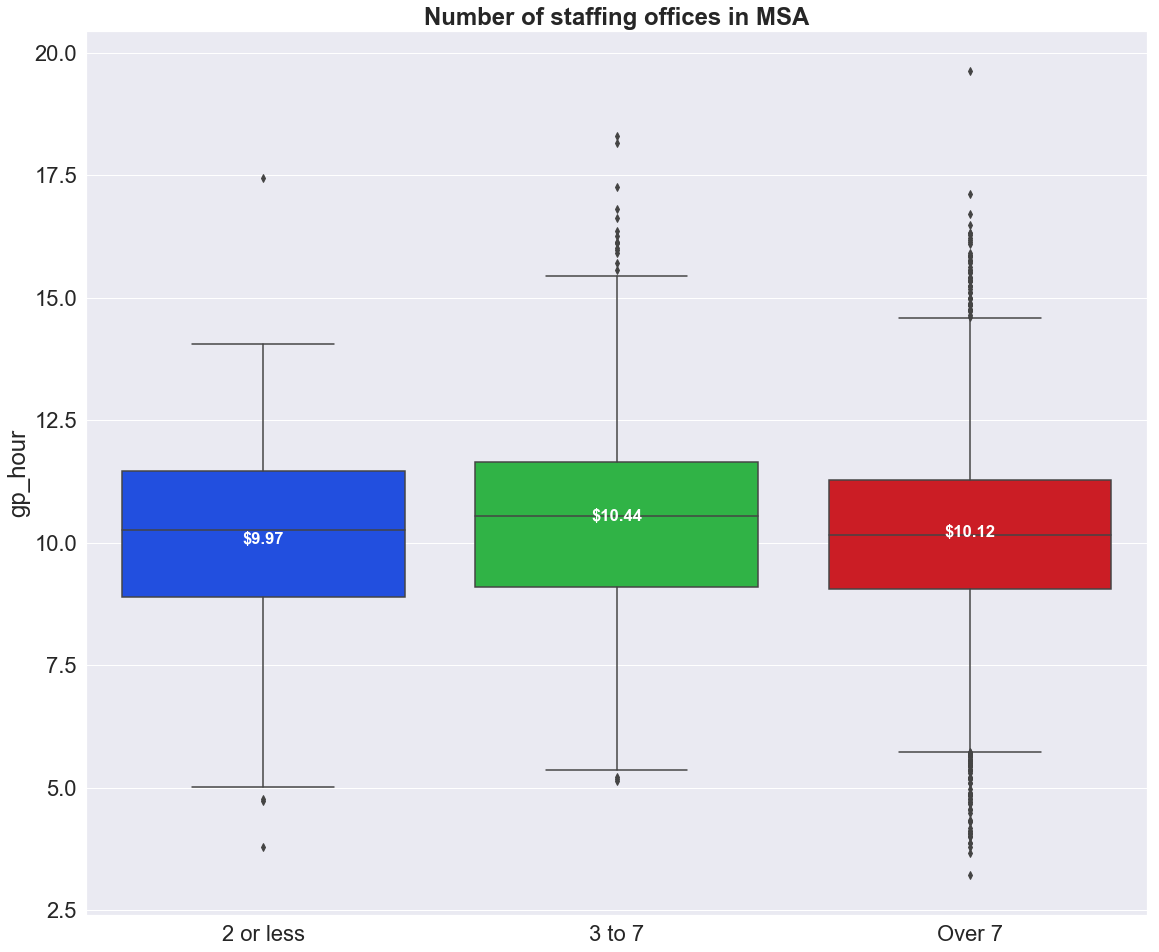

In [9]:
order = ['2 or less','3 to 7','Over 7']

##sns.set(rc={'figure.figsize':(19,16.27)})
sns.set(font_scale = 2)

plot = sns.boxplot(x="competition_office_count_bin", y="gp_hour", data=df , order=order, palette='bright6')
plot.set_title('Number of staffing offices in MSA', weight = 'semibold')
plot.set_ylabel('gp_hour')    
plot.set_xlabel('')

means = df.groupby(['competition_office_count_bin'])['gp_hour'].mean().values
mean_labels = [str('${:,.2f}'.format(np.round(s, 4))) for s in means]

pos = range(len(means))
for tick,label in zip(pos,plot.get_xticklabels()):
    plot.text(pos[tick], means[tick] + 0.001, mean_labels[tick], 
            horizontalalignment='center', size='x-small', color='w', weight='semibold')
    
    
figure = plot.get_figure()


In [10]:
results = ols('gp_hour ~ C(competition_office_count_bin)', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                gp_hour   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     17.59
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           2.44e-08
Time:                        12:47:20   Log-Likelihood:                -10578.
No. Observations:                5146   AIC:                         2.116e+04
Df Residuals:                    5143   BIC:                         2.118e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     9.9690      0.118     84.694      0.000       9.738      10.200
C(competition_office_count_bin)[T.3 to 7]     0.4704      0.127      3.718      0.000       0.222       0.718
C(competition_office_count_bin)[T.Over 7]     0.1551      0.122      1.268      0.205      -0.085       0.395
==============================================================================
Omnibus:                       77.600   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.727
Skew:                          -0.009   Prob(JB):                     8.35e-33
Kurtosis:                       3.830   Cond. No.                         9.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(competition_office_count_bin),125.735271,2.0,17.58767,2.442160e-08
Residual,18383.802240,5143.0,NaN,NaN


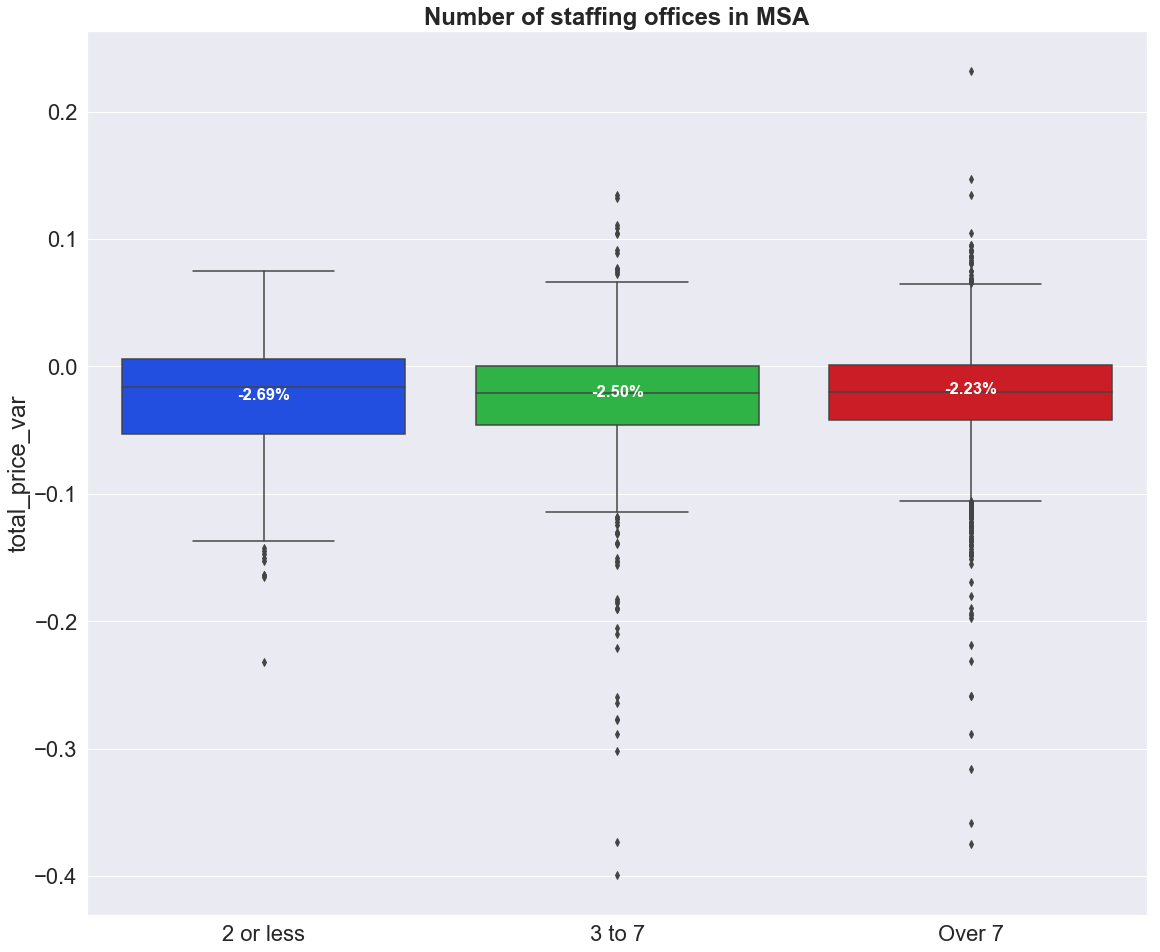

In [12]:
order = ['2 or less','3 to 7','Over 7']

##sns.set(rc={'figure.figsize':(19,16.27)})
sns.set(font_scale = 2)

plot = sns.boxplot(x="competition_office_count_bin", y="total_price_var", data=df , order=order, palette='bright6')
plot.set_title('Number of staffing offices in MSA', weight = 'semibold')
plot.set_ylabel('total_price_var')    
plot.set_xlabel('')

means = df.groupby(['competition_office_count_bin'])['total_price_var'].mean().values
mean_labels = [str("{:.2%}".format(np.round(s, 4))) for s in means]

pos = range(len(means))
for tick,label in zip(pos,plot.get_xticklabels()):
    plot.text(pos[tick], means[tick] + 0.001, mean_labels[tick], 
            horizontalalignment='center', size='x-small', color='w', weight='semibold')
    
    
figure = plot.get_figure()

In [13]:
results = ols('total_price_var ~ C(competition_office_count_bin)', data=df).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        total_price_var   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.307
Date:                Thu, 08 Nov 2018   Prob (F-statistic):             0.0367
Time:                        12:47:20   Log-Likelihood:                 9138.7
No. Observations:                5146   AIC:                        -1.827e+04
Df Residuals:                    5143   BIC:                        -1.825e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -0.0269      0.003    -10.524      0.000      -0.032      -0.022
C(competition_office_count_bin)[T.3 to 7]     0.0019      0.003      0.682      0.495      -0.004       0.007
C(competition_office_count_bin)[T.Over 7]     0.0045      0.003      1.716      0.086      -0.001       0.010
==============================================================================
Omnibus:                     1729.594   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16450.684
Skew:                          -1.328   Prob(JB):                         0.00
Kurtosis:                      11.347   Cond. No.                         9.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(competition_office_count_bin),0.011111,2.0,3.307187,0.036697
Residual,8.639390,5143.0,NaN,NaN


In [15]:
df  = pd.read_csv('COMPETITION_DATA_FRAME.csv')
df = df.loc[df['national_chain_office_pct_bin'] != 'UNK']

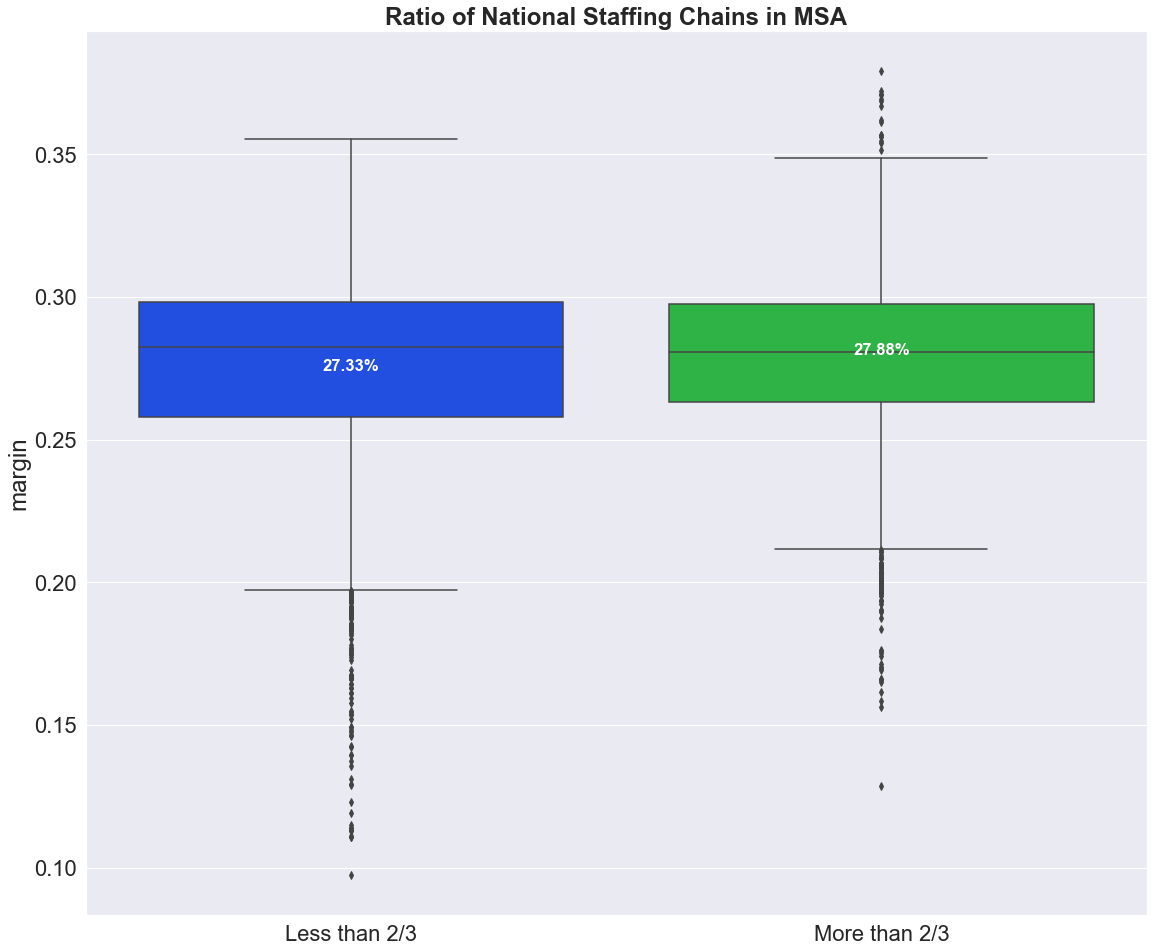

In [16]:
order = ['Less than 2/3','More than 2/3']

sns.set(rc={'figure.figsize':(19,16.27)})
sns.set(font_scale = 2)

plot = sns.boxplot(x="national_chain_office_pct_bin", y="margin", data=df , order=order, palette='bright6')
plot.set_title('Ratio of National Staffing Chains in MSA', weight = 'semibold')
plot.set_ylabel('margin')    
plot.set_xlabel('')

means = df.groupby(['national_chain_office_pct_bin'])['margin'].mean().values
mean_labels = [str("{:.2%}".format(np.round(s, 4))) for s in means]


pos = range(len(means))
for tick,label in zip(pos,plot.get_xticklabels()):
    plot.text(pos[tick], means[tick] + 0.001, mean_labels[tick], 
            horizontalalignment='center', size='x-small', color='w', weight='semibold')
    
    
figure = plot.get_figure()

In [17]:
results = ols('margin ~ C(national_chain_office_pct_bin)', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 margin   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     33.01
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           9.69e-09
Time:                        12:47:21   Log-Likelihood:                 10168.
No. Observations:                5130   AIC:                        -2.033e+04
Df Residuals:                    5128   BIC:                        -2.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             0.2733      0.001    359.231      0.000       0.272       0.275
C(national_chain_office_pct_bin)[T.More than 2/3]     0.0055      0.001      5.745      0.000       0.004       0.007
==============================================================================
Omnibus:                      903.250   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1984.739
Skew:                          -1.021   Prob(JB):                         0.00
Kurtosis:                       5.262   Cond. No.                         3.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(national_chain_office_pct_bin),0.036709,1.0,33.010684,9.693942e-09
Residual,5.702451,5128.0,NaN,NaN


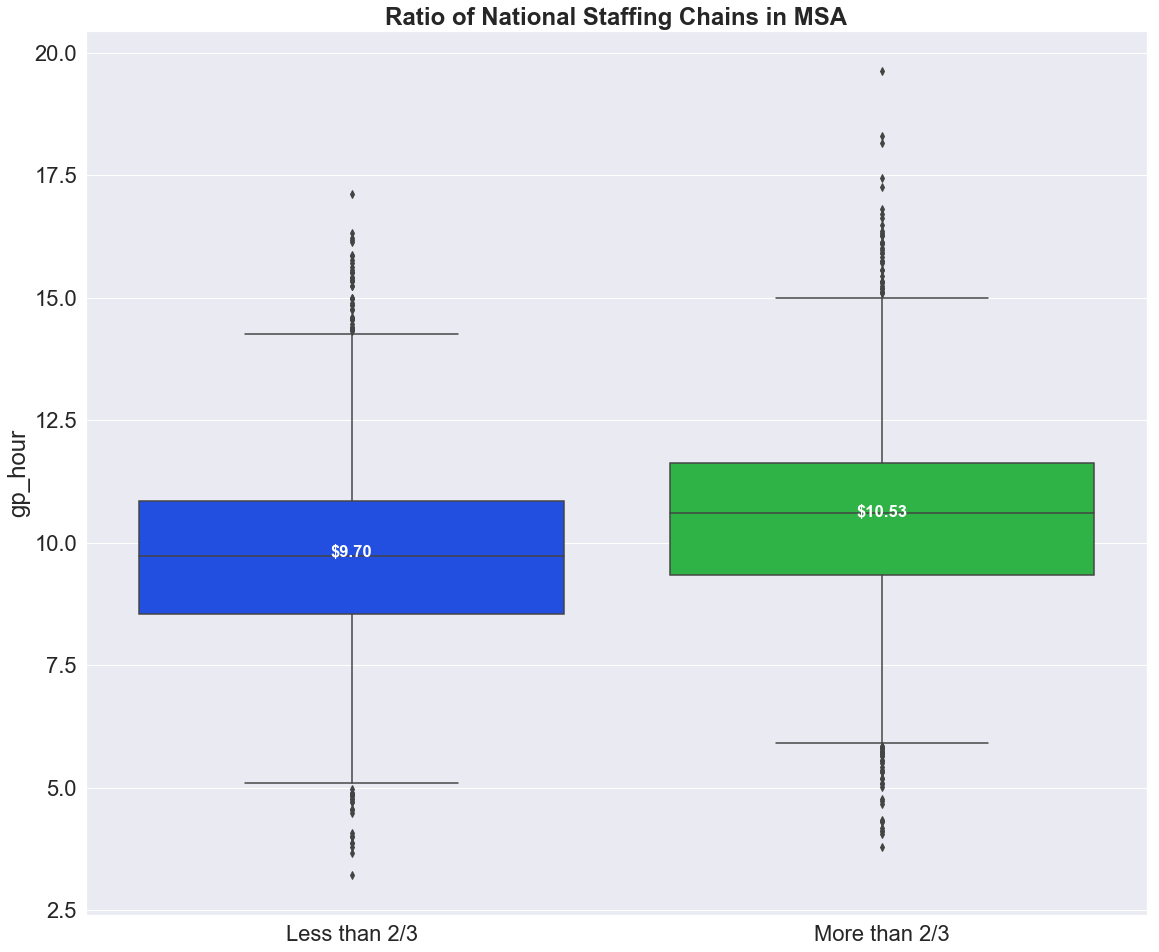

In [19]:
order = ['Less than 2/3','More than 2/3']

sns.set(rc={'figure.figsize':(19,16.27)})
sns.set(font_scale = 2)

plot = sns.boxplot(x="national_chain_office_pct_bin", y="gp_hour", data=df , order=order, palette='bright6')
plot.set_title('Ratio of National Staffing Chains in MSA', weight = 'semibold')
plot.set_ylabel('gp_hour')    
plot.set_xlabel('')

means = df.groupby(['national_chain_office_pct_bin'])['gp_hour'].mean().values
mean_labels = [str("${:,.2f}".format(np.round(s, 4))) for s in means]


pos = range(len(means))
for tick,label in zip(pos,plot.get_xticklabels()):
    plot.text(pos[tick], means[tick] + 0.001, mean_labels[tick], 
            horizontalalignment='center', size='x-small', color='w', weight='semibold')
    
    
figure = plot.get_figure()

In [20]:
results = ols('gp_hour ~ C(national_chain_office_pct_bin)', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                gp_hour   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     238.0
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           1.61e-52
Time:                        12:47:21   Log-Likelihood:                -10453.
No. Observations:                5130   AIC:                         2.091e+04
Df Residuals:                    5128   BIC:                         2.092e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             9.7024      0.042    229.015      0.000       9.619       9.785
C(national_chain_office_pct_bin)[T.More than 2/3]     0.8264      0.054     15.427      0.000       0.721       0.931
==============================================================================
Omnibus:                      100.168   Durbin-Watson:                   1.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.074
Skew:                           0.068   Prob(JB):                     4.85e-45
Kurtosis:                       3.968   Cond. No.                         3.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(national_chain_office_pct_bin),820.571231,1.0,237.991901,1.606072e-52
Residual,17680.808741,5128.0,NaN,NaN


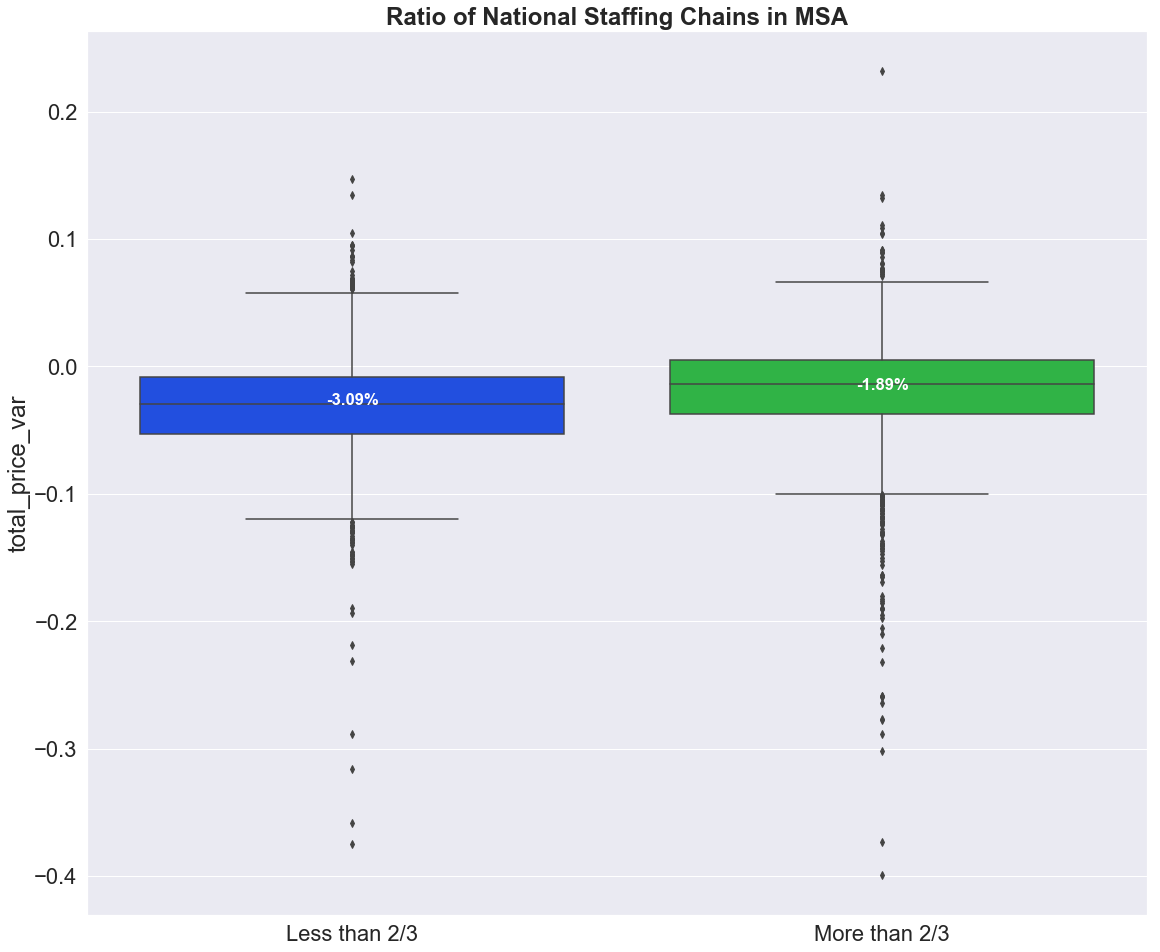

In [22]:
order = ['Less than 2/3','More than 2/3']

sns.set(rc={'figure.figsize':(19,16.27)})
sns.set(font_scale = 2)

plot = sns.boxplot(x="national_chain_office_pct_bin", y="total_price_var", data=df , order=order, palette='bright6')
plot.set_title('Ratio of National Staffing Chains in MSA', weight = 'semibold')
plot.set_ylabel('total_price_var')    
plot.set_xlabel('')

means = df.groupby(['national_chain_office_pct_bin'])['total_price_var'].mean().values
mean_labels = [str("{:.2%}".format(np.round(s, 4))) for s in means]


pos = range(len(means))
for tick,label in zip(pos,plot.get_xticklabels()):
    plot.text(pos[tick], means[tick] + 0.001, mean_labels[tick], 
            horizontalalignment='center', size='x-small', color='w', weight='semibold')
    
    
figure = plot.get_figure()

In [23]:
results = ols('total_price_var ~ C(national_chain_office_pct_bin)', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        total_price_var   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     105.2
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           1.88e-24
Time:                        12:47:21   Log-Likelihood:                 9152.9
No. Observations:                5130   AIC:                        -1.830e+04
Df Residuals:                    5128   BIC:                        -1.829e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                            -0.0309      0.001    -33.304      0.000      -0.033      -0.029
C(national_chain_office_pct_bin)[T.More than 2/3]     0.0120      0.001     10.258      0.000       0.010       0.014
==============================================================================
Omnibus:                     1785.062   Durbin-Watson:                   0.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18436.871
Skew:                          -1.360   Prob(JB):                         0.00
Kurtosis:                      11.880   Cond. No.                         3.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(national_chain_office_pct_bin),0.173808,1.0,105.221953,1.878651e-24
Residual,8.470524,5128.0,NaN,NaN


In [25]:
df  = pd.read_csv('COMPETITION_DATA_FRAME.csv')
df = df.loc[df['office_vol_vs_all_staff_office_bin'] != 'UNK']

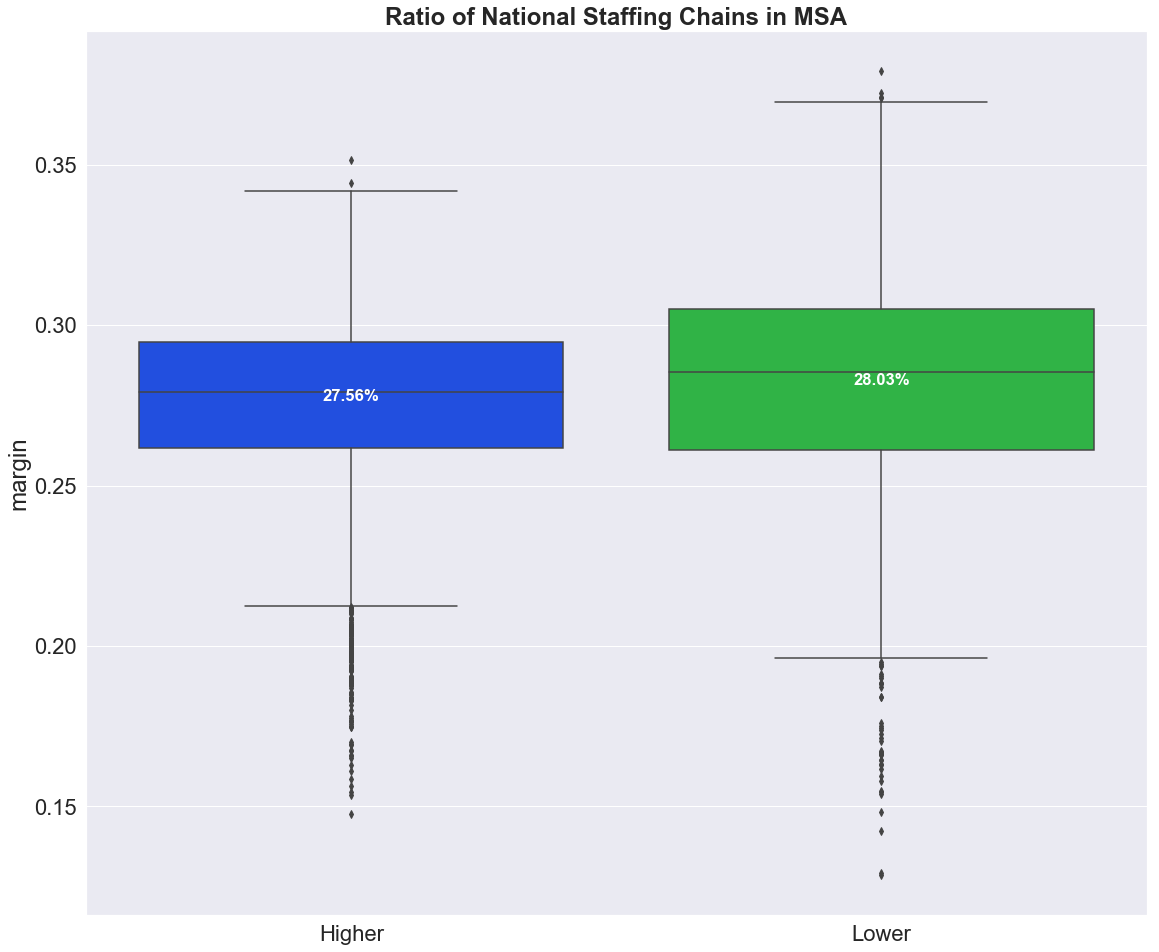

In [26]:
order = ['Higher','Lower']

sns.set(rc={'figure.figsize':(19,16.27)})
sns.set(font_scale = 2)

plot = sns.boxplot(x="office_vol_vs_all_staff_office_bin", y="margin", data=df , order=order, palette='bright6')
plot.set_title('Ratio of National Staffing Chains in MSA', weight = 'semibold')
plot.set_ylabel('margin')    
plot.set_xlabel('')

means = df.groupby(['office_vol_vs_all_staff_office_bin'])['margin'].mean().values
mean_labels = [str("{:.2%}".format(np.round(s, 4))) for s in means]


pos = range(len(means))
for tick,label in zip(pos,plot.get_xticklabels()):
    plot.text(pos[tick], means[tick] + 0.001, mean_labels[tick], 
            horizontalalignment='center', size='x-small', color='w', weight='semibold')
    
    
figure = plot.get_figure()

In [27]:
results = ols('margin ~ C(office_vol_vs_all_staff_office_bin)', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 margin   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     21.91
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           2.93e-06
Time:                        12:47:22   Log-Likelihood:                 9999.3
No. Observations:                4951   AIC:                        -1.999e+04
Df Residuals:                    4949   BIC:                        -1.998e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                          0.2756      0.001    510.027      0.000       0.275       0.277
C(office_vol_vs_all_staff_office_bin)[T.Lower]     0.0047      0.001      4.681      0.000       0.003       0.007
==============================================================================
Omnibus:                      645.895   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1078.169
Skew:                          -0.885   Prob(JB):                    7.56e-235
Kurtosis:                       4.447   Cond. No.                         2.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(office_vol_vs_all_staff_office_bin),0.022599,1.0,21.910319,0.000003
Residual,5.104665,4949.0,NaN,NaN


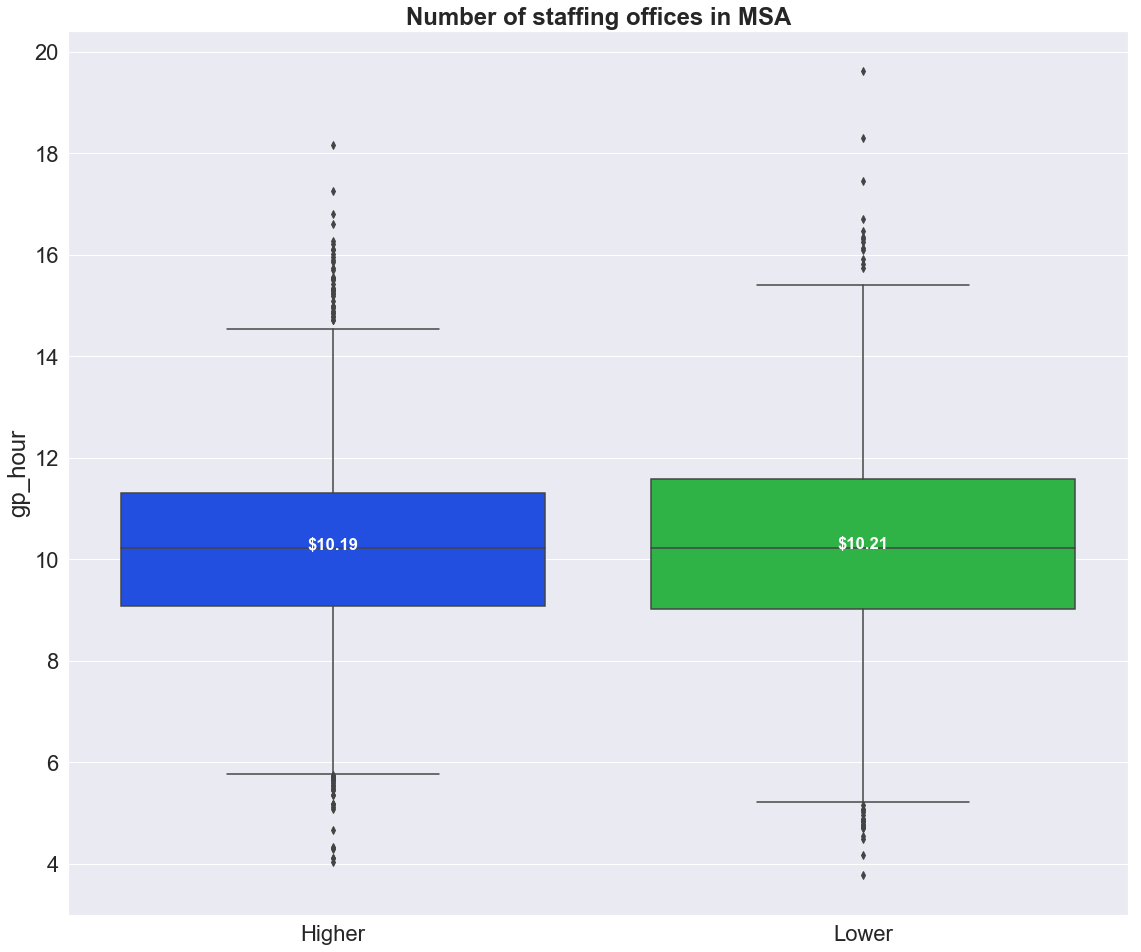

In [29]:
order = ['Higher','Lower']

##sns.set(rc={'figure.figsize':(19,16.27)})
sns.set(font_scale = 2)

plot = sns.boxplot(x="office_vol_vs_all_staff_office_bin", y="gp_hour", data=df , order=order, palette='bright6')
plot.set_title('Number of staffing offices in MSA', weight = 'semibold')
plot.set_ylabel('gp_hour')    
plot.set_xlabel('')

means = df.groupby(['office_vol_vs_all_staff_office_bin'])['gp_hour'].mean().values
mean_labels = [str('${:,.2f}'.format(np.round(s, 4))) for s in means]

pos = range(len(means))
for tick,label in zip(pos,plot.get_xticklabels()):
    plot.text(pos[tick], means[tick] + 0.001, mean_labels[tick], 
            horizontalalignment='center', size='x-small', color='w', weight='semibold')
    
    
figure = plot.get_figure()

In [30]:
results = ols('margin ~ C(office_vol_vs_all_staff_office_bin)', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 margin   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     21.91
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           2.93e-06
Time:                        12:47:22   Log-Likelihood:                 9999.3
No. Observations:                4951   AIC:                        -1.999e+04
Df Residuals:                    4949   BIC:                        -1.998e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                          0.2756      0.001    510.027      0.000       0.275       0.277
C(office_vol_vs_all_staff_office_bin)[T.Lower]     0.0047      0.001      4.681      0.000       0.003       0.007
==============================================================================
Omnibus:                      645.895   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1078.169
Skew:                          -0.885   Prob(JB):                    7.56e-235
Kurtosis:                       4.447   Cond. No.                         2.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(office_vol_vs_all_staff_office_bin),0.022599,1.0,21.910319,0.000003
Residual,5.104665,4949.0,NaN,NaN
